<a href="https://colab.research.google.com/github/hareeshmlops/Acontext/blob/main/Simple_linear_regression_height_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
air=pd.read_csv('/content/drive/MyDrive/Github-projects/ML/Linear-regression/height-weight.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


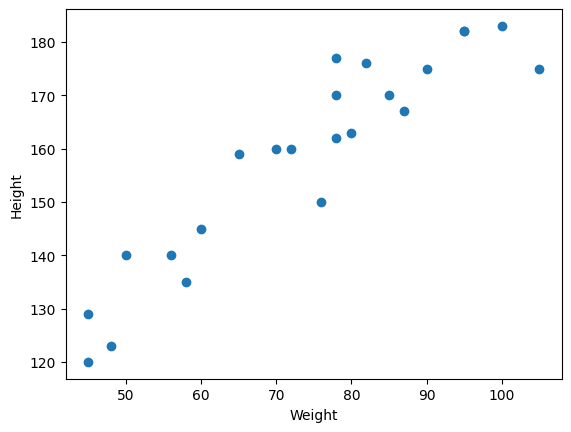

In [28]:
# Scatter plot to check the co-relsation
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [30]:
# Check the co-relesation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


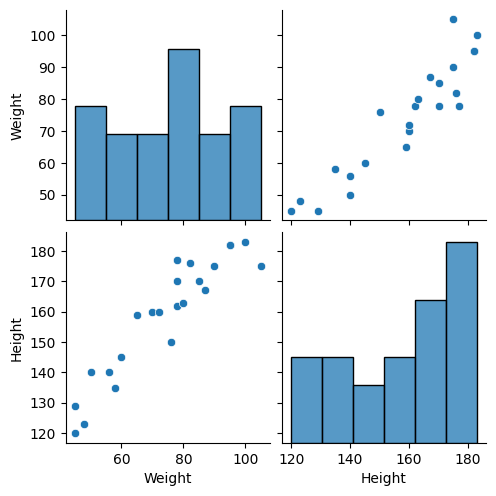

In [34]:
sns.pairplot(df)

In [36]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [57]:
X=df[['Weight']]

In [58]:
X=df[['Weight']] # Indepneded variable must a seriries form
type(X)
X.shape
y=df['Height']

In [48]:
np.array(y).shape

(23,)

In [56]:
# Train and split the date
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [61]:
X_train.shape
X_test.shape

(6, 1)

In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()

In [67]:
X_train=scaler.fit_transform(X_train)

In [69]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [70]:
X_test=scaler.transform(X_test)

In [71]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [73]:
# apply Machine learning mode
from sklearn.linear_model import LinearRegression

In [76]:
regression=LinearRegression(n_jobs=-1)

In [78]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [79]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


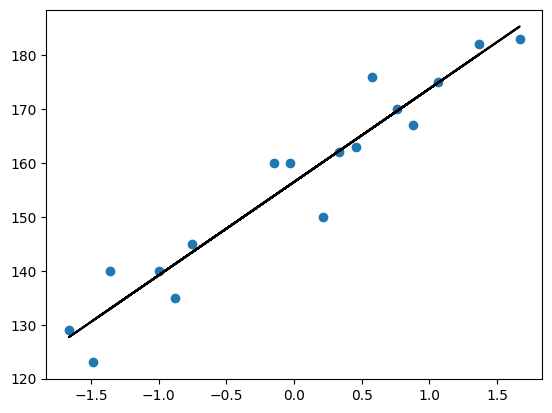

In [82]:
## Plot the Training data plot the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='black')


# Prediction of the test data
1. Predicted height output = intercept + coef_*(weights)
2. y_pred_test = 156.47 + 17.29(X_test)

In [87]:
y_pred=regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [88]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [89]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [90]:
from sklearn.metrics import r2_score

In [91]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [92]:
## OLS Linear Regression
import statsmodels.api as sm


In [93]:
model=sm.OLS(y_train,X_train).fit()


In [94]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [95]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 24 Dec 2025   Prob (F-statistic):                       0.664
Time:                        22:13:54   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [96]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])